# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather"
city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 79.1667, 'lat': 52.2667},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 18.54,
  'feels_like': 18.59,
  'temp_min': 18.54,
  'temp_max': 18.54,
  'pressure': 1005,
  'humidity': 82,
  'sea_level': 1005,
  'grnd_level': 989},
 'visibility': 10000,
 'wind': {'speed': 3.4, 'deg': 236, 'gust': 7.4},
 'clouds': {'all': 19},
 'dt': 1722730685,
 'sys': {'country': 'RU', 'sunrise': 1722726537, 'sunset': 1722781791},
 'timezone': 25200,
 'id': 1503153,
 'name': 'Klyuchi',
 'cod': 200}

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | acarau
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | kone
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | ghanzi
Processing Record 13 of Set 1 | porto-vecchio
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | papao
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | ud

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,18.43,46,75,3.60,CA,1722730567
1,waitangi,-43.9535,-176.5597,8.79,88,76,1.34,NZ,1722730688
2,port elizabeth,-33.9180,25.5701,20.16,21,0,2.57,ZA,1722730689
3,invercargill,-46.4000,168.3500,8.90,74,71,1.79,NZ,1722730690
4,bredasdorp,-34.5322,20.0403,7.67,92,89,3.47,ZA,1722730691


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,18.43,46,75,3.60,CA,1722730567
1,waitangi,-43.9535,-176.5597,8.79,88,76,1.34,NZ,1722730688
2,port elizabeth,-33.9180,25.5701,20.16,21,0,2.57,ZA,1722730689
3,invercargill,-46.4000,168.3500,8.90,74,71,1.79,NZ,1722730690
4,bredasdorp,-34.5322,20.0403,7.67,92,89,3.47,ZA,1722730691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

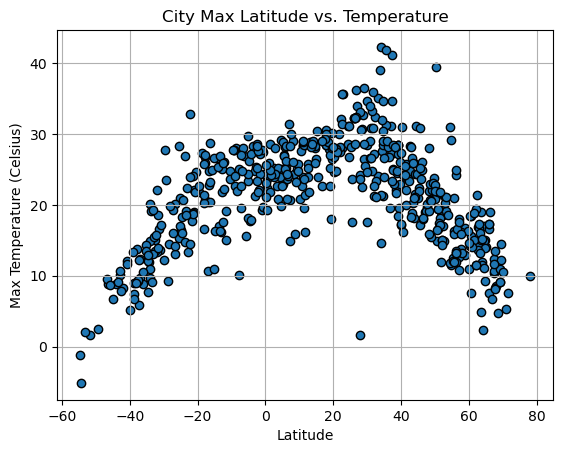

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolors = 'black')
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

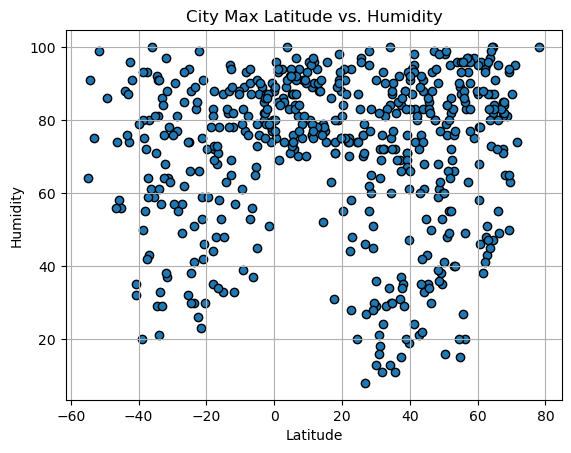

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors = 'black')
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

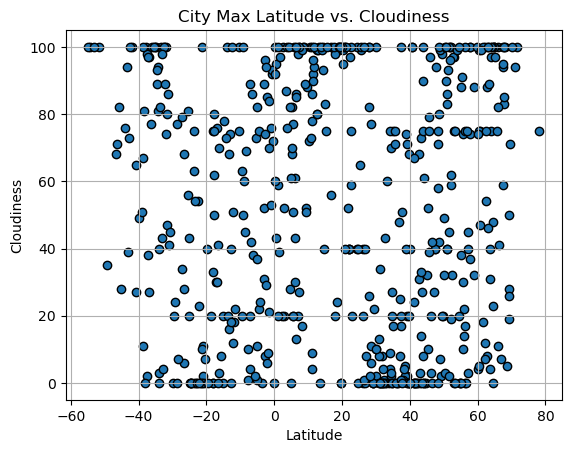

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors = 'black')
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

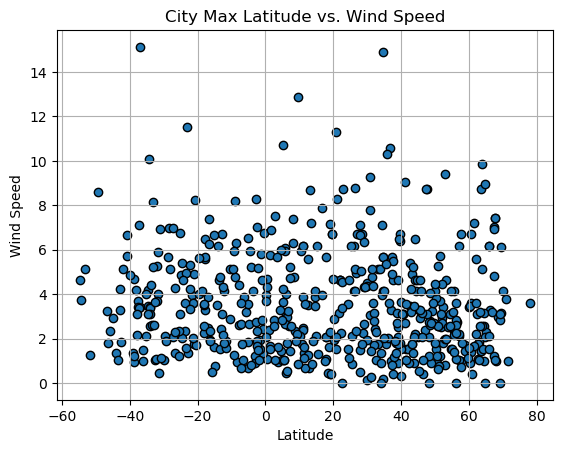

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolors = 'black')
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x_values, y_values):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create linear equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Return all calculated values
    return slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] > 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,18.43,46,75,3.60,CA,1722730567
7,talnakh,69.4865,88.3972,14.49,63,71,3.15,RU,1722730695
8,bethel,41.3712,-73.4140,23.84,95,0,1.54,US,1722730696
12,porto-vecchio,41.5910,9.2795,25.74,83,0,1.03,FR,1722730701
14,jamestown,42.0970,-79.2353,23.80,80,0,1.54,US,1722730703


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.79,88,76,1.34,NZ,1722730688
2,port elizabeth,-33.9180,25.5701,20.16,21,0,2.57,ZA,1722730689
3,invercargill,-46.4000,168.3500,8.90,74,71,1.79,NZ,1722730690
4,bredasdorp,-34.5322,20.0403,7.67,92,89,3.47,ZA,1722730691
5,acarau,-2.8856,-40.1200,25.41,82,31,8.26,BR,1722730692


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3715780675629482


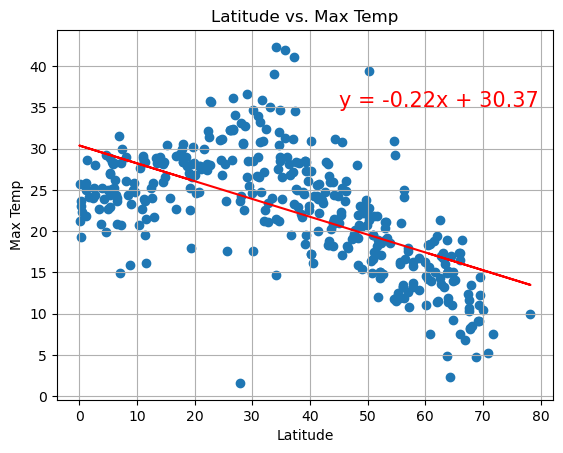

In [41]:
# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(45,35),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()


The r^2-value is: 0.6275558409134043


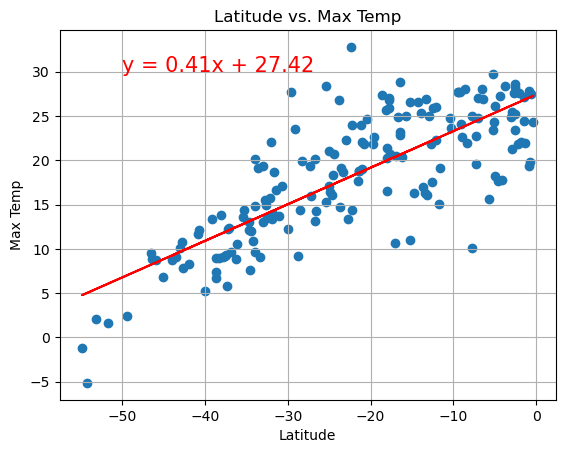

In [43]:
# Linear regression on Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o")
plt.plot(southern_hemi_df['Lat'],regress_values,'r-')
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,30),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** In the latitude versus maximum temperature graphs we seeing the highest correlation between the two. In the southern hemisphere a clearer relationship can be shown as it has a higher r^2 value meaning the linear regression is a better fit. In terms of max temperature versus latitude, it makes sense that both the graphs leaving or going towards zero latitude have a higher max temperature because of zero being the line at the equator. However, in the northern hemisphere graph, a few outliers can be shown around latitude of 30 which adds up considering there are desert regions along this area. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.010750481319151586


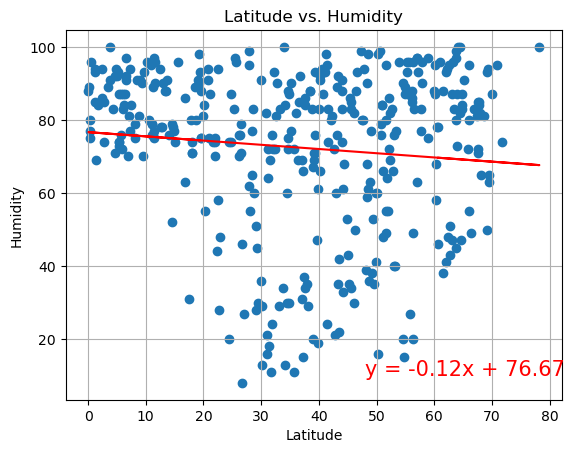

In [47]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(48,10),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.017197090790193433


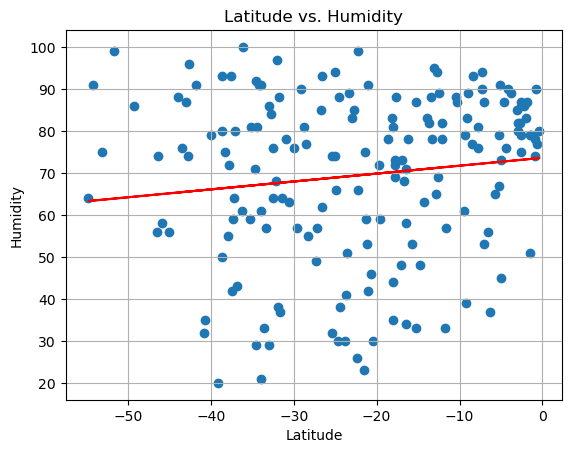

In [49]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-56,10),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Both graphs have very poor correlation between latitude and humidity. This may be caused by the fact that humidity versus latitude is a non-linear relationship because of the amount of factors that affect humidity. Humidity is impacted by areas distance to the ocean or bodies of water, temperature, and other geographical features. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006621671390682202


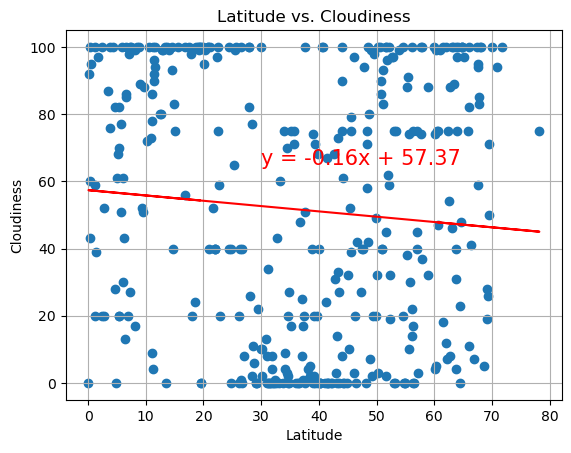

In [53]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(30,65),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0507399927555239


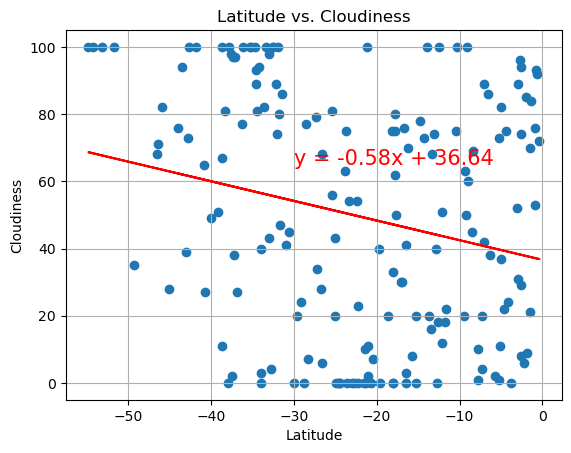

In [55]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-30,65),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Similar to that of the humidity graph, cloudiness is non-linear considering how many factors come into play. Both r^2 values show how a linear relationship can not be exactly drawn with cloudiness versus latitude as it is constantly changing regardless of the hemisphere. One can make note that between the northern and southern hemisphere there is more data points within the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.007066348236805469


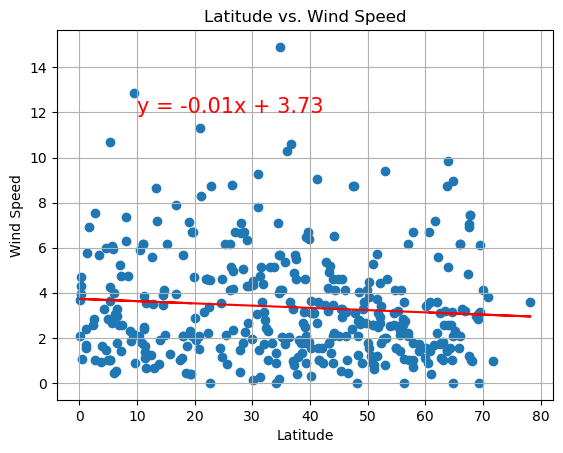

In [59]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,12),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.004804725064303363


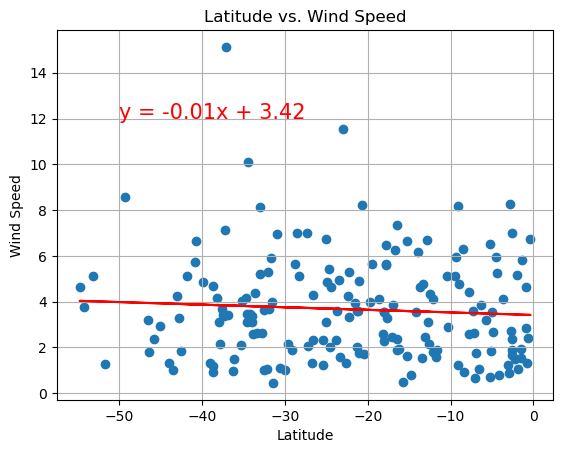

In [61]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values,'r-')
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,12),fontsize = 15,color = 'red')

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Seems wind speed and latitude have roughly similar graphs between the northern and southern hemisphere. Again, the r^2 values show that the linear fit especially with the values below 0.01 show how poorly the line fits the graph. Wind speed however seems to have higher values in the northern hemisphere. 